In [26]:
# Dependencies and Setup
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

# Function for forward select linear model

In [2]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {}".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [3]:
# Importing the csv
df= pd.read_csv('fidelity_mutual_funds_return_w_risk.csv')
df.head()

,name,morningstar_category,ytdDaily,yr1,yr3,yr5,yr10,life_of_fund,net_expense_ratio,gross_expense_ratio,morningstar_rating_overall,risk,std_dev,sharpe_ratio_3_yr,beta,r2,minimum_investment,last_dividend
0,Baron Partners Fund Institutional Shares (BPTIX),Large Growth,44.60,110.27,65.56,47.54,29.02,27.02,1.30,1.30,1137.0,6,40.41,1.60,1.51,0.63,1000000.0,0.2224
1,Baron Partners Fund Retail Shares (BPTRX),Large Growth,44.28,109.72,65.13,47.15,28.68,20.45,1.56,1.56,1137.0,6,40.39,1.59,1.51,0.63,2500.0,0.1243
2,"Morgan Stanley Institutional Fund, Inc. Incept...",Small Growth,20.05,81.15,55.11,38.37,22.37,14.14,1.00,1.19,574.0,7,40.44,1.34,1.40,0.71,5000000.0,0.0000
3,"Morgan Stanley Institutional Fund, Inc. Incept...",Small Growth,19.75,80.67,54.70,37.98,22.01,13.83,1.35,1.45,574.0,7,40.48,1.32,1.40,0.71,2500.0,0.0000
4,"Morgan Stanley Institutional Fund, Inc. Incept...",Small Growth,NaN,79.39,53.46,36.90,21.11,13.00,2.10,2.27,574.0,7,40.42,1.30,1.40,0.71,2500.0,NaN


In [4]:
df.columns

Index(['name', 'morningstar_category', 'ytdDaily', 'yr1', 'yr3', 'yr5', 'yr10',
       'life_of_fund', 'net_expense_ratio', 'gross_expense_ratio',
       'morningstar_rating_overall', 'risk', 'std_dev', 'sharpe_ratio_3_yr',
       'beta', 'r2', 'minimum_investment', 'last_dividend'],
      dtype='object')

In [5]:
# Extracting all the numeric columns
df_num = df[['ytdDaily', 'yr1', 'yr3', 'yr5', 'yr10',
       'life_of_fund', 'net_expense_ratio', 'gross_expense_ratio',
       'morningstar_rating_overall', 'risk', 'std_dev', 'sharpe_ratio_3_yr',
       'beta', 'r2', 'minimum_investment', 'last_dividend']].dropna()
df_num

,ytdDaily,yr1,yr3,yr5,yr10,life_of_fund,net_expense_ratio,gross_expense_ratio,morningstar_rating_overall,risk,std_dev,sharpe_ratio_3_yr,beta,r2,minimum_investment,last_dividend
0,44.60,110.27,65.56,47.54,29.02,27.02,1.30,1.30,1137.0,6,40.41,1.60,1.51,0.63,1000000.0,0.222400
1,44.28,109.72,65.13,47.15,28.68,20.45,1.56,1.56,1137.0,6,40.39,1.59,1.51,0.63,2500.0,0.124300
2,20.05,81.15,55.11,38.37,22.37,14.14,1.00,1.19,574.0,7,40.44,1.34,1.40,0.71,5000000.0,0.000000
3,19.75,80.67,54.70,37.98,22.01,13.83,1.35,1.45,574.0,7,40.48,1.32,1.40,0.71,2500.0,0.000000
5,29.85,78.53,51.07,37.87,21.75,21.12,1.07,1.07,550.0,6,33.96,1.47,1.16,0.62,1000000.0,0.002900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9190,50.49,112.78,-11.17,-9.38,-4.58,-1.65,1.35,1.87,72.0,8,48.41,-0.25,1.12,0.95,2500.0,0.112000
9192,37.18,106.34,-16.52,-14.67,-12.41,-3.39,1.42,1.42,72.0,8,56.46,-0.31,2.44,0.64,2500.0,1.837037
9193,36.87,105.81,-16.69,-14.87,-12.72,-3.74,1.68,1.68,72.0,8,56.42,-0.31,2.44,0.64,2500.0,1.837037
9194,36.89,105.82,-16.74,-14.88,-12.62,-3.63,1.68,1.68,72.0,8,56.44,-0.32,2.44,0.64,2500.0,1.837037


# Linear regression model

In [6]:
model = forward_selected(df_num.dropna(), 'yr10')
print("Selected features for the model:")
print(model.model.formula)
print("----------------------------------")
print("Adjusted R squared for the model:")
print(model.rsquared_adj)

Selected features for the model:
yr10 ~ yr5 + yr3 + life_of_fund + ytdDaily + yr1 + r2 + gross_expense_ratio + morningstar_rating_overall + risk + sharpe_ratio_3_yr + std_dev + net_expense_ratio + minimum_investment
----------------------------------
Adjusted R squared for the model:
0.9444266011578509


In [7]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   yr10   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     8109.
Date:                Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:24:31   Log-Likelihood:                -10247.
No. Observations:                6203   AIC:                         2.052e+04
Df Residuals:                    6189   BIC:                         2.062e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [23]:
for col in df_num.columns.difference(['yr10']):
    print(f"Correlation between yr10 and {col} is {stats.pearsonr(df_num['yr10'].values,df_num[col].values)[0]}")

Correlation between yr10 and beta is 0.12149760903649987
Correlation between yr10 and gross_expense_ratio is -0.04346650161253017
Correlation between yr10 and last_dividend is 0.012887342813199684
Correlation between yr10 and life_of_fund is 0.8252743569158878
Correlation between yr10 and minimum_investment is 0.03846300222625629
Correlation between yr10 and morningstar_rating_overall is 0.5347603693302175
Correlation between yr10 and net_expense_ratio is 0.003729528079597519
Correlation between yr10 and r2 is 0.36018935158952103
Correlation between yr10 and risk is 0.5510176060654152
Correlation between yr10 and sharpe_ratio_3_yr is 0.4220422281895806
Correlation between yr10 and std_dev is 0.5833578563997678
Correlation between yr10 and yr1 is 0.6612711971272356
Correlation between yr10 and yr3 is 0.8749152051615142
Correlation between yr10 and yr5 is 0.9461939495764182
Correlation between yr10 and ytdDaily is 0.6567130333247715


In [34]:
X = df_num[df_num.columns.difference(['yr10'])].dropna()
y = df_num['yr10'].dropna().values
predictions = model.predict(X).values
r2 = model.rsquared_adj

In [35]:
correlation, p_value = stats.pearsonr(y,predictions)
print(f"Correlation between actual and predicted is {correlation}")

Correlation between actual and predicted is 0.9718760664044801


Text(0.5, 1.0, 'Actual vs Predicted plot')

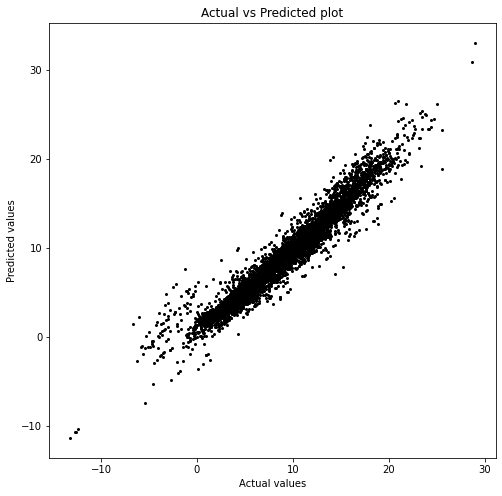

In [45]:
plt.figure(figsize=(8,8))
plt.plot(y, predictions, 'o', color='black', markersize=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title('Actual vs Predicted plot')

# Model plot with one explanatory variable

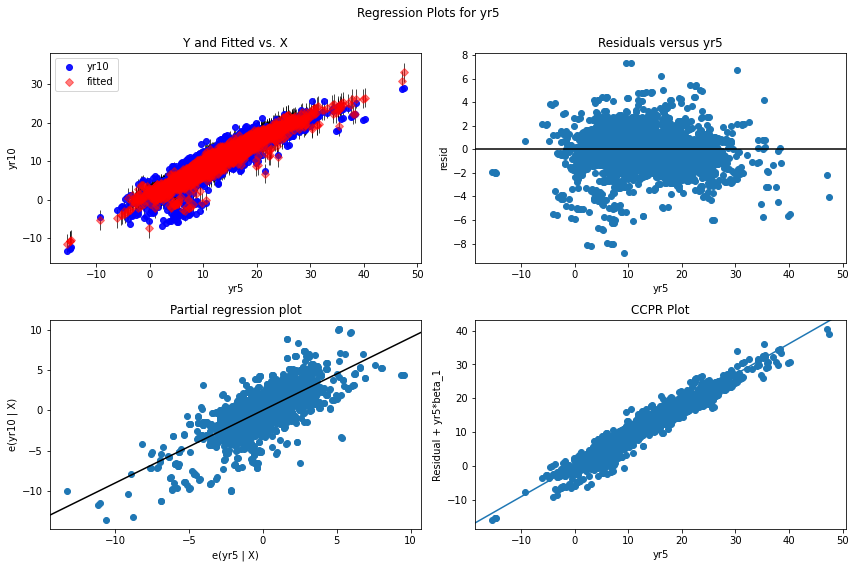

In [17]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'yr5', fig=fig)

## Residual plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residual plot')

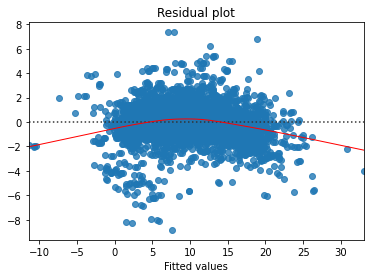

In [42]:
sn.residplot(response,y, data = df_num.dropna(),lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

In [39]:
residuals = y - predictions
residuals

array([-4.01766782, -2.1700478 ,  0.06551326, ..., -2.0163843 ,
       -1.95942283, -1.89180646])

## Normal Q-Q Plot

Text(0.5, 1.0, 'Normal Q-Q Plot')

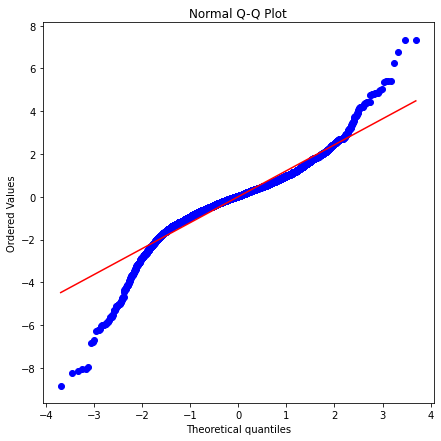

In [40]:
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

# Anova of OLS model

In [11]:
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
yr5,1.0,159572.166398,159572.166398,99913.721691,0.000000e+00
yr3,1.0,4072.959165,4072.959165,2550.222371,0.000000e+00
life_of_fund,1.0,3199.929739,3199.929739,2003.588073,0.000000e+00
ytdDaily,1.0,669.963411,669.963411,419.487554,2.934155e-90
yr1,1.0,365.704202,365.704202,228.980208,8.004859e-51
r2,1.0,188.684904,188.684904,118.142226,2.842844e-27
gross_expense_ratio,1.0,111.082308,111.082308,69.552523,9.083572e-17
morningstar_rating_overall,1.0,38.323975,38.323975,23.995983,9.899106e-07
risk,1.0,27.740343,27.740343,17.369200,3.119681e-05
sharpe_ratio_3_yr,1.0,50.175736,50.175736,31.416786,2.171539e-08


# Anova for different years' rates

In [12]:
stats.f_oneway(df_num['yr1'], df_num['yr3'], df_num['yr5'], df_num['yr10'])

F_onewayResult(statistic=2917.3689315577753, pvalue=0.0)

#### As the p-value is close to 0, we can say that the returns of each years are different